## Data Importation

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load in the dataset
df = pd.read_csv("original_dataset.csv")

# Display basic information about the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

The original dataset was loading into a Pandas Dataframe. Based off of the `.info()`, the dataset contains 6,607 records and 20 columns and the data types were identified, a mix of numerical and categorical values.

**Numerical Values**
* `Hours_Studied`
* `Attendance`
* `Sleep_Hours`
* `Previous_Scores`
* `Tutoring_Sessions`
* `Physical_Activity`
* `Exam_Score`

**Categorical Values**
* `Parental_Involvement`
* `Access_to_Resources`
* `Extracurricular_Activities`
* `Motivation_Level`
* `Internet_Access`
* `Family_Income`
* `Teacher_Quality`
* `School_Type`
* `Peer_Influence`
* `Learning_Disabilities`
* `Parental_Education_Level`
* `Distance_from_Home`
* `Gender`

## Initial Exploration

We first looked at the dataset using `.describe()` to generate a statistical summary of the numerical columns. A histogram and box plot were used to look at the exam score distributions and see if there any outliers. 

In [3]:
# Create summary statistics for numerical columns
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


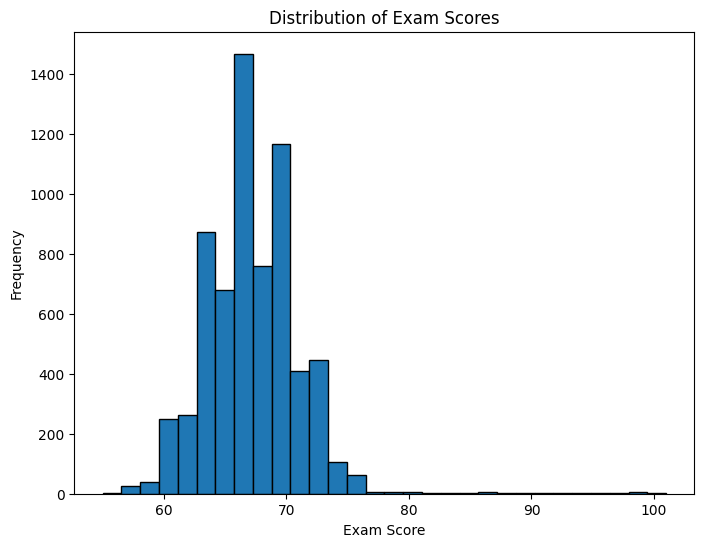

In [4]:
# Plot 1: Histogram of Exam Score
plt.figure(figsize=(8, 6))
plt.hist(df['Exam_Score'], bins=30, edgecolor='black')
plt.title('Distribution of Exam Scores')
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.show()

### Plot 1 Insights
* The bell-shaped curve suggests that most of the students are performing within a similar range, 60-75 with some outliers.
* The peak of the plot is around 67 which aligns with the mean from the statistical summary above for the `Exam_Score`.
* There are a few outliers slightly above 100. 

/var/folders/t0/hzg53ff9319g3z7q6s1nj6fc0000gn/T/ipykernel_86141/226475429.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=categories)


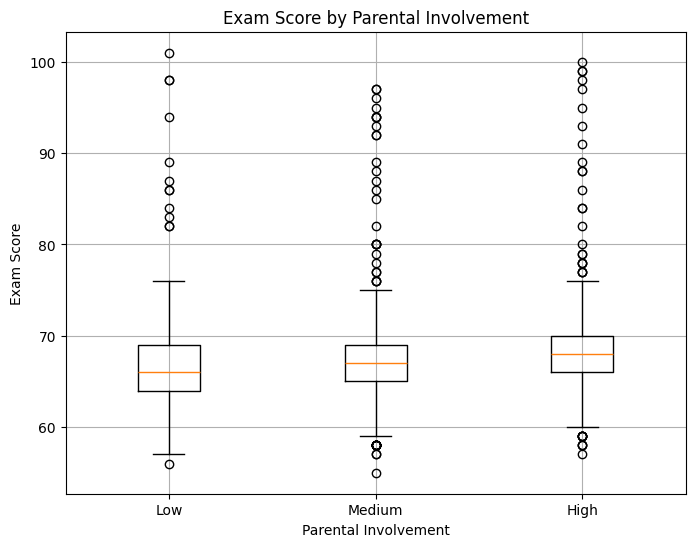

In [5]:
# Plot 2: Box Plot of Exam Score by Parental Involvement
plt.figure(figsize=(8,6))
categories = df['Parental_Involvement'].dropna().unique()
data_to_plot = [df[df['Parental_Involvement'] == cat]['Exam_Score'] for cat in categories]

plt.boxplot(data_to_plot, labels=categories)
plt.title('Exam Score by Parental Involvement')
plt.xlabel('Parental Involvement')
plt.ylabel('Exam Score')
plt.grid()
plt.show()

### Plot 2 Insights
* Students with **High** parental involvement tend to score better with the highest median exam scores, then **Medium**, and lastly **Low**, which suggests that there is a positive relationship between parental involvement and exam scores.
* Each group contains several outliers towards the higher end of exam scores. This shows that there are students who are performing well regardless of how involved their parents are or possible just some inconsistencies in reporting and grading. 

## Cleaning Dataset

### Missing Data:
There were three columns that had missing values:
* Teacher_Quality - 78
* Parental_Education_Level - 90
* Distance_from_Home - 67

For these missing values, we used **mode** because the mode represents the most common and likely value.

### Outliers:
We saw from two plots that there were some exam scores that were above 100. To avoid these outliers, we chose to cap the scores at 100 so that we could still maintain our full dataset. 

In [6]:
# Check for any missing values
missing_values = df.isnull().sum()

print(f"Missing Values per Column:\n", missing_values)

Missing Values per Column:
 Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64


In [7]:
# Represent any missing cateogrical values with the mode
df['Teacher_Quality'].fillna(df['Teacher_Quality'].mode()[0])
df['Parental_Education_Level'].fillna(df['Parental_Education_Level'].mode()[0])
df['Distance_from_Home'].fillna(df['Distance_from_Home'].mode()[0])

# Cap Exam_Score at 100 in case any value exceeds it
df['Exam_Score'] = df['Exam_Score'].apply(lambda x: min(x, 100))

# Save Cleaned Dataset
file_path = "cleaned_dataset.csv"
df.to_csv(file_path, index=False)